```{exercise}
Set up matrices $A$ and $B$ for the problem in Python for step $h=10^{-3}$ and solve to obtain the solution for $y$.
```

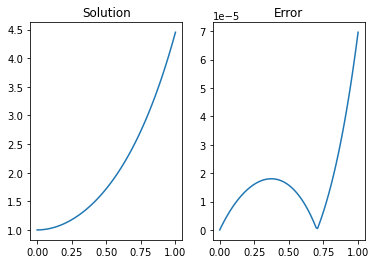

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nodes
n=100                  # solving with 100 nodes
x=np.linspace(0,1,n)   # on the domain [0,1]
h = x[1]-x[0]          # size of each interval

# Construct tridiagonal matrix A and vector b
# Initially we do not worry about implementation of the BCs

coeff1 = 1-h/2
coeff2 = -2-6*h**2
coeff3 = 1+h/2

A = np.diag(coeff1*np.ones((1,n-1))[0], -2) + \
    np.diag(coeff2*np.ones((1,n))[0], -1) + \
    np.diag(coeff3*np.ones((1,n+1))[0],0)

# Alternative method of construction (creates a sparse matrix)
#from scipy.sparse import spdiags
#import numpy.matlib as ml
#A = ml.repmat([coeff1,coeff2,coeff3],n+1,1)   #column-wise matrix diagonals
#A= np.transpose(A)                            #row-wise matrix diagonals
#diags = np.array([-2, -1, 0])
#A = spdiags(A, diags, n+1, n+1).toarray()

b = np.zeros((n+1,1))                          #The problem was homogeneous

# Enforce the boundary conditions

#y_{-1}-y_1=0:
A[0,[0,1,2]] = [-1,0,1]
b[0]=0

#y_0=1
A[1, [0,1,2]] = [0,1,0]
b[1] = 1

y,_,_,_= np.linalg.lstsq(A,b,rcond = None)
y = y[1:]                                     #remove fictitious end point

fig,ax = plt.subplots(1,2)
ax[0].plot(x,y)
ax[0].set_title('Solution')
ysol = (2*np.exp(-3*x) + 3*np.exp(2*x))/5
ax[1].plot(x,abs((y.T-ysol).T))
ax[1].set_title('Error')
plt.show()

```{exercise}
* Write down  a discretised form of these equations, using a central difference scheme.
*	Solve the discretised system with 50 grid points simultaneously using a matrix method.
*	Solve the discretised system with 50 grid points using a Gauss-Seidel technique. Determine the number of iterations required for agreement with your part (2) solution to within $10^{-4}$.
```


## 1D diffusion
Enceladus is a small, icy moon of Saturn, which has been observed to emit molecules of water from "cracks" in its surface. The following differential equation represents the competition between outward diffusion of water molecules from the surface and destruction due to ionization:
```{math}
	2r\frac{\partial c}{\partial r} + r^2\frac{\partial^2 c}{\partial r^2}=r^2 c \beta_{LOSS}.
```

In this equation, $r$ is the radial distance from the centre of the moon, $c$ is the steady state concentration of water molecules, and $\beta_{LOSS}$ represents the relative importance of ionization compared to diffusion. We will take
\begin{equation*}
	\beta_{LOSS}=0.01, \qquad c(1)=1, \qquad c(50)=0.1,\qquad r\in[1,50].
\end{equation*}

```{exercise}
* Write down  a discretised form of these equations, using a central difference scheme.
*	Solve the discretised system with 50 grid points simultaneously using a matrix method.
*	Solve the discretised system with 50 grid points using a Gauss-Seidel technique. Determine the number of iterations required for agreement with your part (2) solution to within $10^{-4}$.
```

**Solution**

**Part 1: Discretisation**
\begin{equation*}
2r_i\frac{c_{i+1}-c_{i-1}}{2\Delta r}+r_i^2\frac{c_{i+1}-2c_i+c_{i-1}}{\Delta r^2}=\beta_{LOSS} r_i^2 c_i
\end{equation*}

We can also eliminate a factor of $\frac{r_i}{\Delta r^2}$ to give:

\begin{equation*}
(c_{i+1}-c_{i-1})\Delta r +r_i(c_{i+1}-2c_i+c_{i-1})=\beta_{LOSS}\Delta r^2 r_i c_i
\end{equation*}

**Part 2: Matrix method**

Grouping together terms gives (for example):

\begin{equation*}
(r_i-\Delta r)c_{i-1}-(2r_i+\beta_{LOSS}\Delta r^2 r_i)c_i +(r_i+\Delta r)c_{i+1}=0
\end{equation*}

```{code}
n=50; bloss=0.01;   % Values defined in the question

r=linspace(1,50,n); % Set up the radial coordinate
hr=r(2)-r(1);       % Determine the grid spacing

M = zeros(n,n);     % Construct the grid


% CONSTRUCTION OF COEFFICIENTS FOR INTERIOR NODES
for k=2:n-1
    M(k,k-1)=(r(k)-hr);            
    M(k,k)=-(2*r(k)+bloss*hr^2*r(k));
    M(k,k+1)=(r(k)+hr);
end

% alternative approach using diag:
% rint = r(2:n-1);
% diag(rint-hr,-1)+diag([1,-2+bloss*hr^2*rint,1]) + diag(rint+hr,1)

% CONSTRUCTION OF COEFFICIENTS FOR BOUNDARY NODES
M(1,1)=1; M(end,end)=1;

% CONSTRUCTION OF RHS
b=zeros(n,1);b(1)=1;b(n)=0.1; % interior + boundary

sol1=(M\b).';
```

**Part 3: Gauss-Seidel method**

```{code}
% Set up an initial grid for the solution
c=zeros(1,n); c(1) = 1; c(end)=0.1;

for j=1:1000 %bound on maximum number of iterations
    for k=2:n-1
        c(k) = ((r(k)+hr)*c(k+1) +(r(k)-hr)*c(k-1))/(2*r(k)+bloss*hr^2*r(k));
    end
    if norm(c-sol1)<1e-4
         fprintf('Converged after %d iterations,',j)
        break
    end
end
```

```{code}
% Plots
figure
subplot(2,1,1)
plot(r,sol1,'b')
title('Solution by Matrix method')
subplot(2,1,2)
plot(r,c,'r')
title('Solution by Gauss-Seidel method')
```